<a href="https://colab.research.google.com/github/aksakalaigit/dgnb_semisup_pub_api/blob/main/gr_client_semisup_dgnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Discriminative Semi-Supervised Gaussian Naive Bayes

In this tutorial, we will illustrate how to use the discriminative semi-supervised training algorithm for Gaussian Naive Bayes on https://huggingface.co/spaces/Caglarari/dgnb_semisup_pub_api interactively using Gradio Python client

We can form mixtures of any probabilistic model. Here, we will consider Gaussian Naive Bayes which is a Gaussian mixture model with diagonal covariance matrices.

For probabilistic generative models, the main objective in the discriminative semi-supervised learning setting is simple. We'd like to model the unlabeled data as well as we can while making as few errors as possible on the labeled data.

We can think of discriminative semi-supervised training of mixture models both as a classifier design algorithm and as a clustering method.

From a clustering perspective, we are partitioning the unlabeled data into regions where we use labeled data points to specify which regions each mixture component should cover & which regions it shouldn't.

From a classification point of view, we are learning a classifier that does as few errors as possible on the labeled data while modeling the distribution of unlabeled data points in the neighborhood as well as possible.

We need to install the Gradio Python client so that we can use https://huggingface.co/spaces/Caglarari/dgnb_semisup_pub_api as an API

In [2]:
!pip install gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 7.4 MB/s eta 0:00:00


In [3]:
from gradio_client import Client

Loads https://huggingface.co/spaces/Caglarari/dgnb_semisup_pub_api as an API

In [4]:
myclient = Client("Caglarari/dgnb_semisup_pub_api")

Loaded as API: https://caglarari-dgnb-semisup-pub-api.hf.space ✔


Let's see all callable functions.
We will only use predict(param_0, param_1, param_2, api_name="/train_dgnb_semisup_api")

In [5]:
myclient.view_api()

Client.predict() Usage Info
---------------------------
Named API endpoints: 10

 - predict(api_name="/ex1_func") -> (discriminative_gaussian_naive_bayes_classification_error_weight_c, dataset, labels)
    Parameters:
     - None
    Returns:
     - [Number] discriminative_gaussian_naive_bayes_classification_error_weight_c: float 
     - [Dataframe] dataset: dict(headers: list[Any], data: list[list[Any]], metadata: dict(str, list[Any] | None) | None) 
     - [Dataframe] labels: dict(headers: list[Any], data: list[list[Any]], metadata: dict(str, list[Any] | None) | None) 

 - predict(api_name="/ex2_func") -> (discriminative_gaussian_naive_bayes_classification_error_weight_c, dataset, labels)
    Parameters:
     - None
    Returns:
     - [Number] discriminative_gaussian_naive_bayes_classification_error_weight_c: float 
     - [Dataframe] dataset: dict(headers: list[Any], data: list[list[Any]], metadata: dict(str, list[Any] | None) | None) 
     - [Dataframe] labels: dict(headers: list[

We will use a simple 2D dataset in data_NB.csv so that we can plot the results

In [6]:
!wget https://github.com/aksakalaigit/dgnb_semisup_pub_api/raw/refs/heads/main/data_NB.csv

--2025-04-21 06:30:41--  https://github.com/aksakalaigit/dgnb_semisup_pub_api/raw/refs/heads/main/data_NB.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aksakalaigit/dgnb_semisup_pub_api/refs/heads/main/data_NB.csv [following]
--2025-04-21 06:30:42--  https://raw.githubusercontent.com/aksakalaigit/dgnb_semisup_pub_api/refs/heads/main/data_NB.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8160 (8.0K) [text/plain]
Saving to: ‘data_NB.csv’

data_NB.csv         100%[===================>]   7.97K  --.-KB/s    in 0s      

2025-04-21 06:30:42 (71.8 MB/s) - ‘data_NB.csv’ saved [8160/8160]



We will also get the default labels in labels_NB.csv for data_NB.csv.

In [7]:
!wget https://github.com/aksakalaigit/dgnb_semisup_pub_api/raw/refs/heads/main/labels_NB.csv

--2025-04-21 06:30:45--  https://github.com/aksakalaigit/dgnb_semisup_pub_api/raw/refs/heads/main/labels_NB.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aksakalaigit/dgnb_semisup_pub_api/refs/heads/main/labels_NB.csv [following]
--2025-04-21 06:30:46--  https://raw.githubusercontent.com/aksakalaigit/dgnb_semisup_pub_api/refs/heads/main/labels_NB.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4001 (3.9K) [text/plain]
Saving to: ‘labels_NB.csv’

labels_NB.csv       100%[===================>]   3.91K  --.-KB/s    in 0s      

2025-04-21 06:30:46 (51.5 MB/s) - ‘labels_NB.csv’ saved [4001

In [8]:
import numpy as np
import pandas as pd

In colab_utils.py we have various utility functions that we will use for data manipulation & plotting

In [9]:
!wget https://github.com/aksakalaigit/dgnb_semisup_pub_api/raw/refs/heads/main/colab_utils.py

--2025-04-21 06:30:52--  https://github.com/aksakalaigit/dgnb_semisup_pub_api/raw/refs/heads/main/colab_utils.py
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aksakalaigit/dgnb_semisup_pub_api/refs/heads/main/colab_utils.py [following]
--2025-04-21 06:30:52--  https://raw.githubusercontent.com/aksakalaigit/dgnb_semisup_pub_api/refs/heads/main/colab_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4738 (4.6K) [text/plain]
Saving to: ‘colab_utils.py’

colab_utils.py      100%[===================>]   4.63K  --.-KB/s    in 0s      

2025-04-21 06:30:53 (43.4 MB/s) - ‘colab_utils.py’ saved 

In [10]:
import colab_utils as cu

Read csv files as dataframes & then form numpy arrays

In [11]:
dfData=pd.read_csv('data_NB.csv',header=None)
dfLabs=pd.read_csv('labels_NB.csv',header=None)

In [12]:
dfLabs=dfLabs.apply(pd.to_numeric,errors='coerce')
npLabs=dfLabs.to_numpy()
npLabs=npLabs.astype('int32')
#
npLabs=npLabs.T
npLabs=npLabs.reshape((npLabs.shape[0],))

Default labels are 0 for the data points in class 1 & 1 for the data points in class 2

In [13]:
npLabs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [14]:
npLabs.shape

(160,)

In [15]:
npData=dfData.to_numpy()

In [16]:
npData.shape

(160, 2)

## *Example 1*

We will change the default labels.
For discriminative semi-supervised Gaussian Naive Bayes training code, We need to use label 0 for the unlabeled data points & label k for the data points in class k.

In [68]:
#0 -> unlabeled, k-> labeled k
npLabs[:]=0
npLabs[[16,37,73]]=1
npLabs[[82,123,158]]=2
#
npLabs_new=npLabs[:,np.newaxis]
npLabs_new=npLabs_new.T

In [71]:
npLabs_new.shape

(1, 160)

Let's plot the semi-labeled dataset first

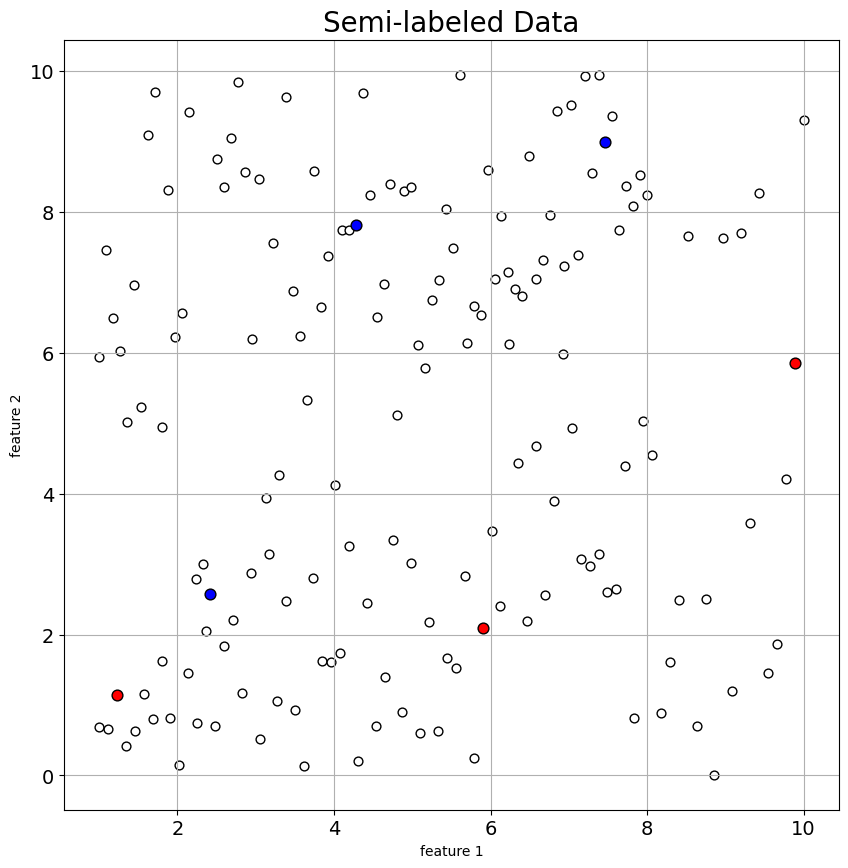

In [70]:
fig10=cu.plot_data(npData,npLabs)

We need to convert the numpy arrays into appropriate form using np2dict so that we can use them as inputs to the API

In [72]:
dict_Data=cu.np2dict(npData)
dict_Labs=cu.np2dict(npLabs_new)
kC1=1.0

We will use predict(...,api_name="/train_dgnb_semisup_api") to train the model.
It will return the parameters of the Gaussians, alpha, mu,cova

In [73]:

retdict_alpha,retdict_mu,retdict_cova,retdict_ynew,it=myclient.predict(dict_Data,dict_Labs,kC1,api_name="/train_dgnb_semisup_api")

We need to form numpy arrays for further computations & plotting

In [74]:
ret_alpha=np.array(retdict_alpha['data'])
ret_mu=np.array(retdict_mu['data'])
ret_cova=np.array(retdict_cova['data'])
ret_ynew=np.array(retdict_ynew['data'])

In [75]:
ret_alpha

array([[0.68697887],
       [0.31302113]])

In [76]:
ret_alpha.shape

(2, 1)

In [77]:
ret_mu

array([[3.95241168, 6.56910346],
       [7.29221646, 1.33134224]])

In [78]:
ret_mu.shape

(2, 2)

We will plot the results of the dicriminative semi-supervised Gaussian Naive Bayes training algorithm

In [79]:
X=npData
ynew=ret_ynew.reshape((ret_ynew.shape[0],),order='F')


In [80]:
ynew.shape

(160,)

In [81]:
bmask_un=(ynew==0)
#Xun=X[bmask_un,:]
Xlab=X[~bmask_un,:]
ylab=ynew[~bmask_un]
#
lab_labels=np.unique(ylab)
kNum_lab_labels=lab_labels.shape[0]

In [82]:
kNum_lab_labels

2

In [83]:
ylab.shape

(6,)

The learned Gaussian Naive Bayes parameters should model the unlabeled data as well as possible while making as few errors as possible on the labeled data

<Figure size 1000x1000 with 0 Axes>

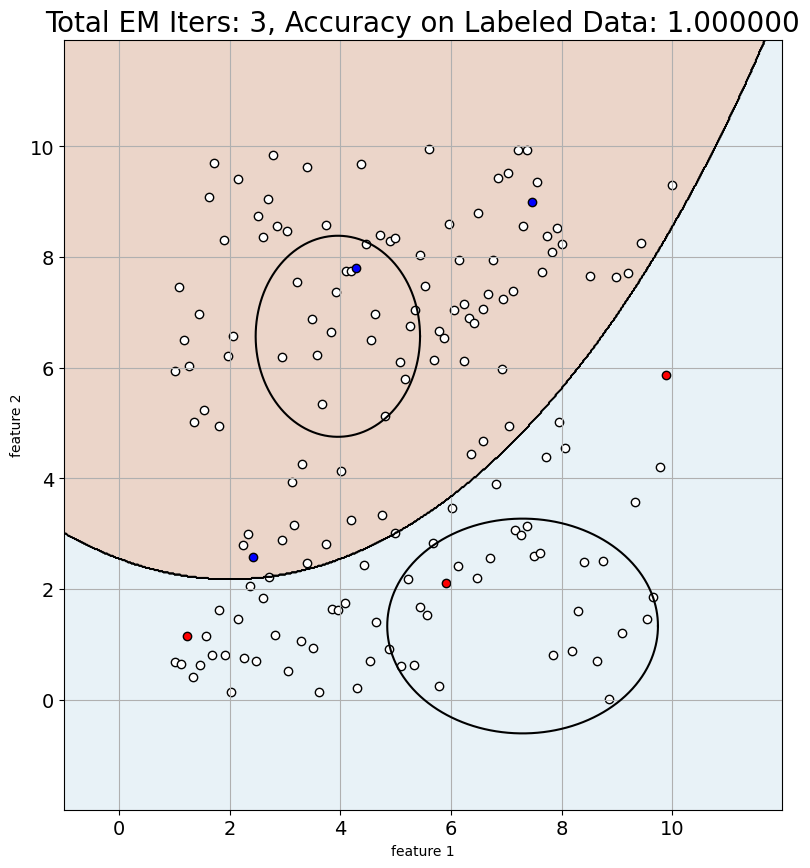

In [84]:
fig11=cu.plot_dgnb_semisup(ret_alpha,ret_mu,ret_cova,X,ynew,Xlab,ylab,kNum_lab_labels,it)

## Example 2

In [85]:
npLabs[:]=0
npLabs[[37,73]]=1
npLabs[[123,158]]=2
npLabs[[16,82]]=3
#
npLabs_new=npLabs[:,np.newaxis]
npLabs_new=npLabs_new.T

Let's plot the semi-labeled dataset

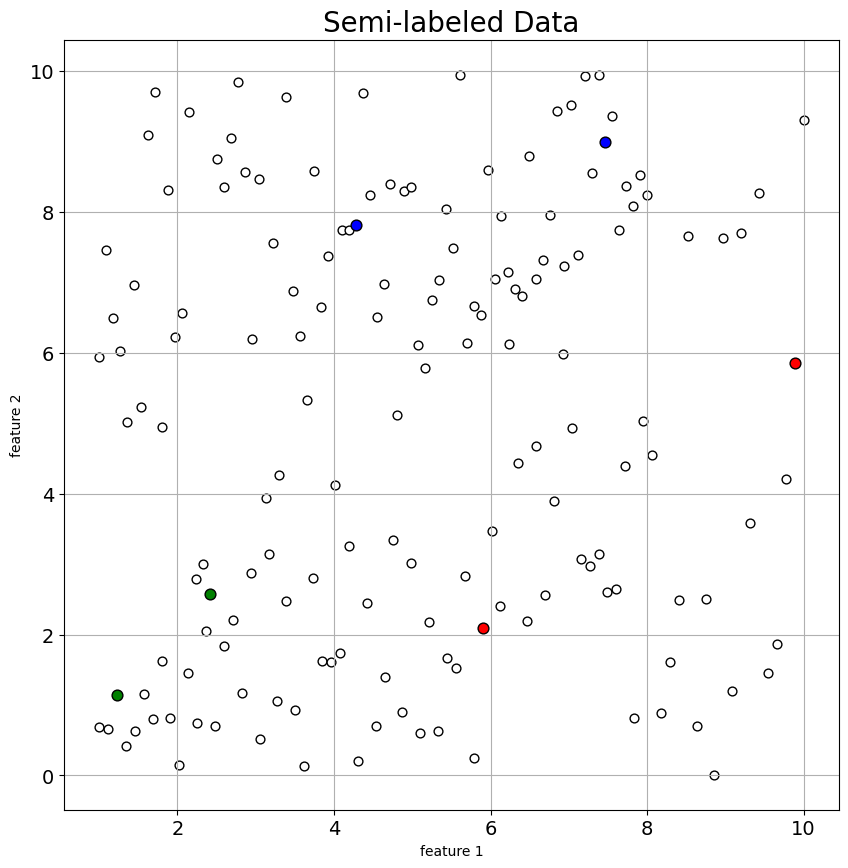

In [86]:
fig20=cu.plot_data(npData,npLabs)

In [93]:
dict_Data=cu.np2dict(npData)
dict_Labs=cu.np2dict(npLabs_new)
kC1=1.0

In [94]:
retdict_alpha,retdict_mu,retdict_cova,retdict_ynew,it=myclient.predict(dict_Data,dict_Labs,kC1,api_name="/train_dgnb_semisup_api")

In [95]:
ret_alpha=np.array(retdict_alpha['data'])
ret_mu=np.array(retdict_mu['data'])
ret_cova=np.array(retdict_cova['data'])
ret_ynew=np.array(retdict_ynew['data'])

In [96]:
ynew=ret_ynew.reshape((ret_ynew.shape[0],),order='F')

In [97]:
bmask_un=(ynew==0)
#Xun=X[bmask_un,:]
Xlab=X[~bmask_un,:]
ylab=ynew[~bmask_un]
#
lab_labels=np.unique(ylab)
kNum_lab_labels=lab_labels.shape[0]

In [98]:
kNum_lab_labels

3

<Figure size 1000x1000 with 0 Axes>

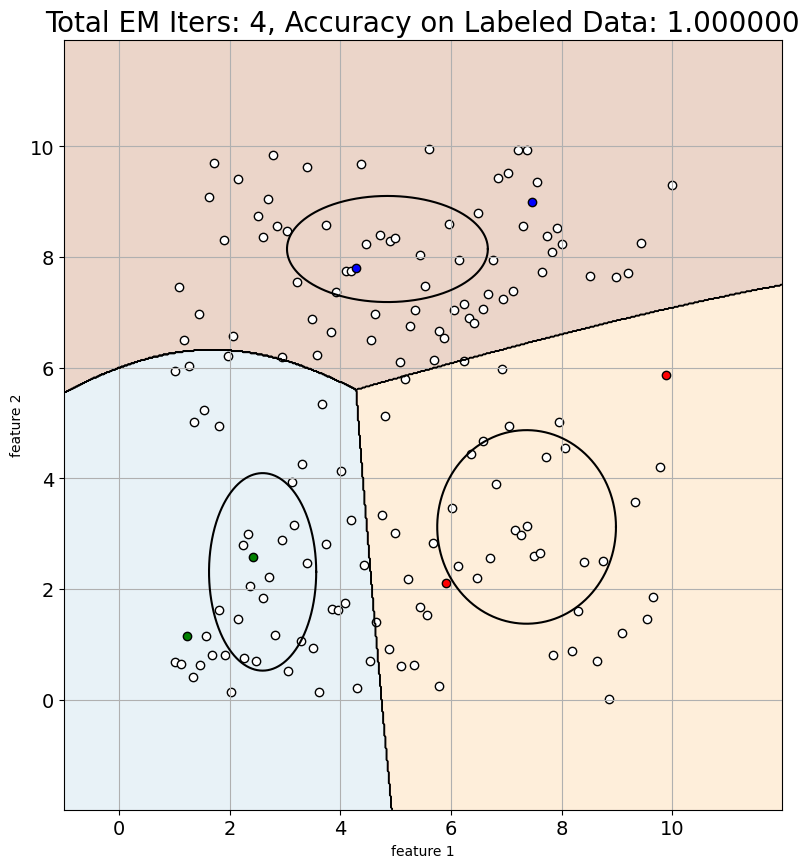

In [99]:
fig21=cu.plot_dgnb_semisup(ret_alpha,ret_mu,ret_cova,X,ynew,Xlab,ylab,kNum_lab_labels,it)

## Example 3

In [100]:
npLabs[:]=0
npLabs[[3,37,73]]=1
npLabs[[123,158]]=2
npLabs[[16,82]]=3
#
npLabs_new=npLabs[:,np.newaxis]
npLabs_new=npLabs_new.T

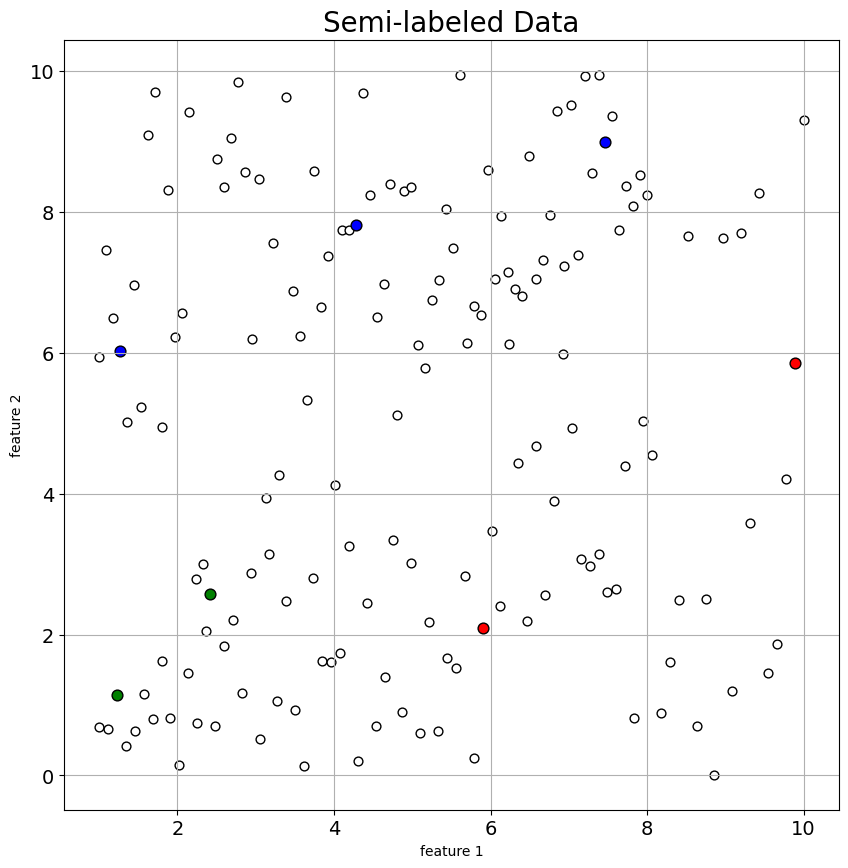

In [101]:
fig30=cu.plot_data(npData,npLabs)

In [102]:
dict_Data=cu.np2dict(npData)
dict_Labs=cu.np2dict(npLabs_new)
kC1=1.0

In [103]:
retdict_alpha,retdict_mu,retdict_cova,retdict_ynew,it=myclient.predict(dict_Data,dict_Labs,kC1,api_name="/train_dgnb_semisup_api")

In [104]:
ret_alpha=np.array(retdict_alpha['data'])
ret_mu=np.array(retdict_mu['data'])
ret_cova=np.array(retdict_cova['data'])
ret_ynew=np.array(retdict_ynew['data'])

In [105]:
ynew=ret_ynew.reshape((ret_ynew.shape[0],),order='F')

In [106]:
bmask_un=(ynew==0)
#Xun=X[bmask_un,:]
Xlab=X[~bmask_un,:]
ylab=ynew[~bmask_un]
#
lab_labels=np.unique(ylab)
kNum_lab_labels=lab_labels.shape[0]

<Figure size 1000x1000 with 0 Axes>

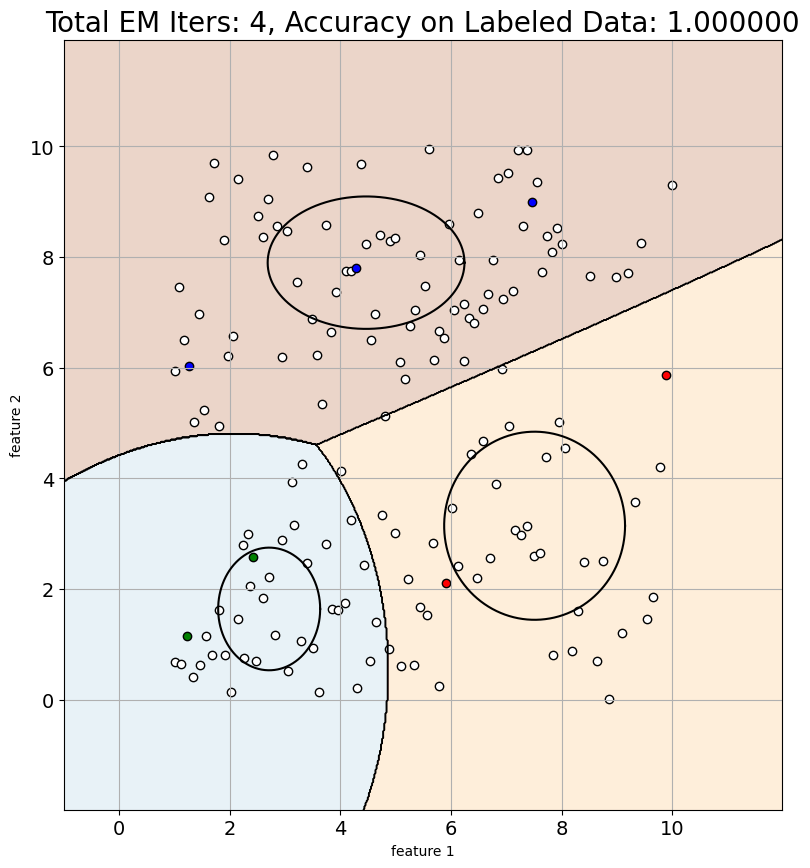

In [107]:
fig31=cu.plot_dgnb_semisup(ret_alpha,ret_mu,ret_cova,X,ynew,Xlab,ylab,kNum_lab_labels,it)

## Example 4

In [108]:
npLabs[:]=0
npLabs[[10,35,71]]=1
npLabs[[0,46]]=2
npLabs[[34,131]]=3
npLabs[[15,123,148]]=4
npLabs[[82,114,151]]=5
#
npLabs_new=npLabs[:,np.newaxis]
npLabs_new=npLabs_new.T

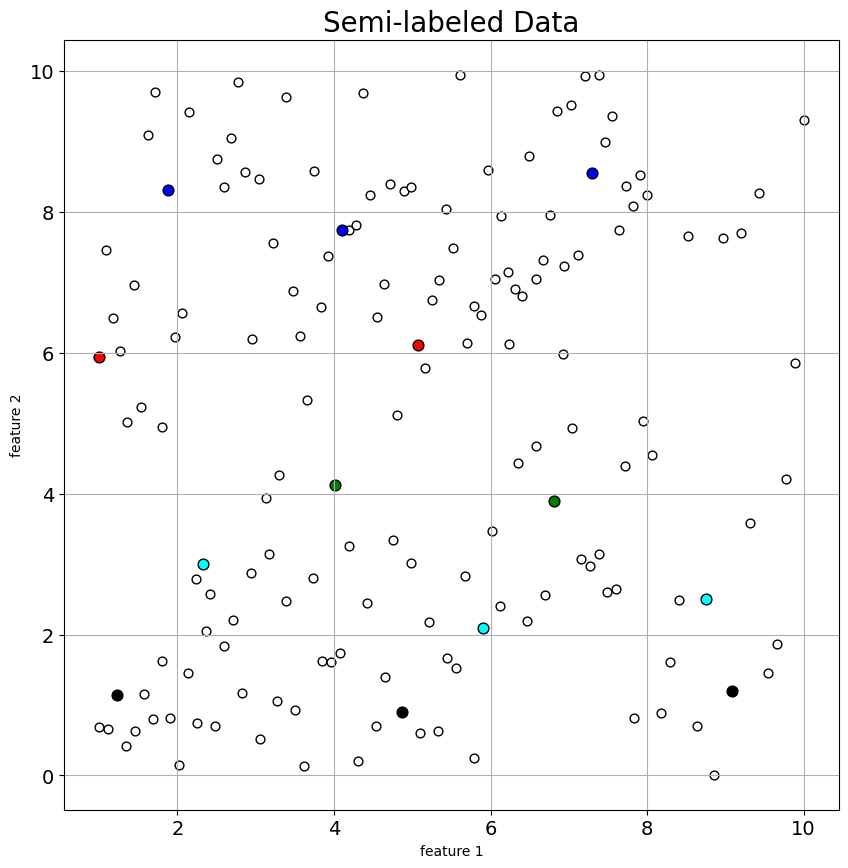

In [109]:
fig40=cu.plot_data(npData,npLabs)

In [110]:
dict_Data=cu.np2dict(npData)
dict_Labs=cu.np2dict(npLabs_new)
kC1=1.0

In [111]:
retdict_alpha,retdict_mu,retdict_cova,retdict_ynew,it=myclient.predict(dict_Data,dict_Labs,kC1,api_name="/train_dgnb_semisup_api")

In [112]:
ret_alpha=np.array(retdict_alpha['data'])
ret_mu=np.array(retdict_mu['data'])
ret_cova=np.array(retdict_cova['data'])
ret_ynew=np.array(retdict_ynew['data'])

In [113]:
ynew=ret_ynew.reshape((ret_ynew.shape[0],),order='F')

In [114]:
bmask_un=(ynew==0)
#Xun=X[bmask_un,:]
Xlab=X[~bmask_un,:]
ylab=ynew[~bmask_un]
#
lab_labels=np.unique(ylab)
kNum_lab_labels=lab_labels.shape[0]

<Figure size 1000x1000 with 0 Axes>

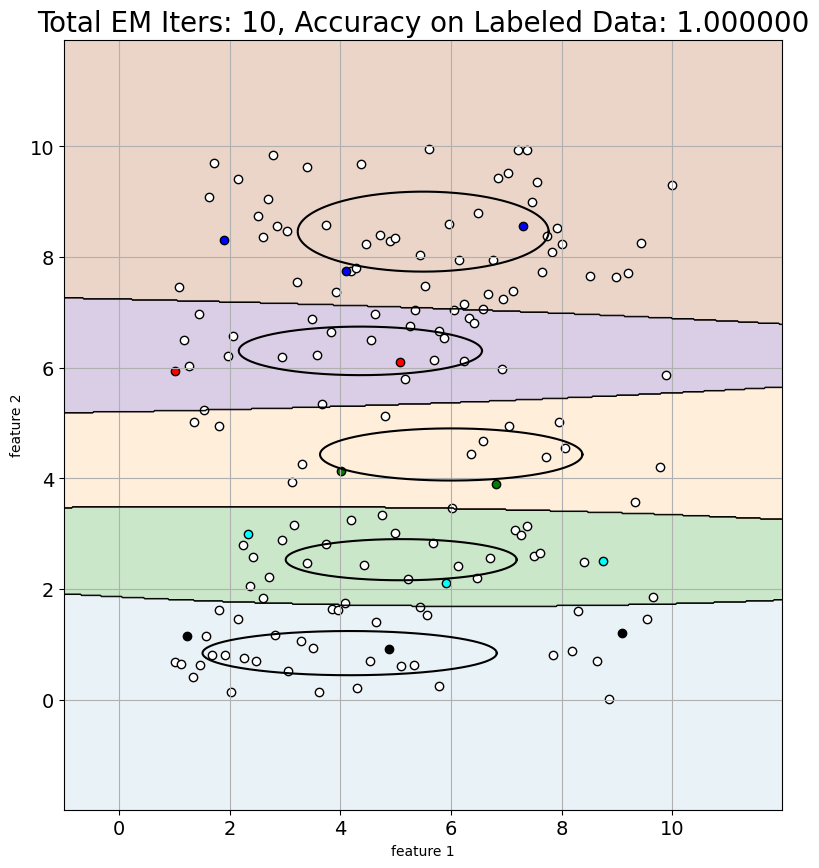

In [115]:
fig41=cu.plot_dgnb_semisup(ret_alpha,ret_mu,ret_cova,X,ynew,Xlab,ylab,kNum_lab_labels,it)

## Example 5

In [116]:
npLabs[:]=0
npLabs[[10,0,15,82]]=1
npLabs[[35,46,34,114,123]]=2
npLabs[[71,131,148,151]]=3
#
npLabs_new=npLabs[:,np.newaxis]
npLabs_new=npLabs_new.T

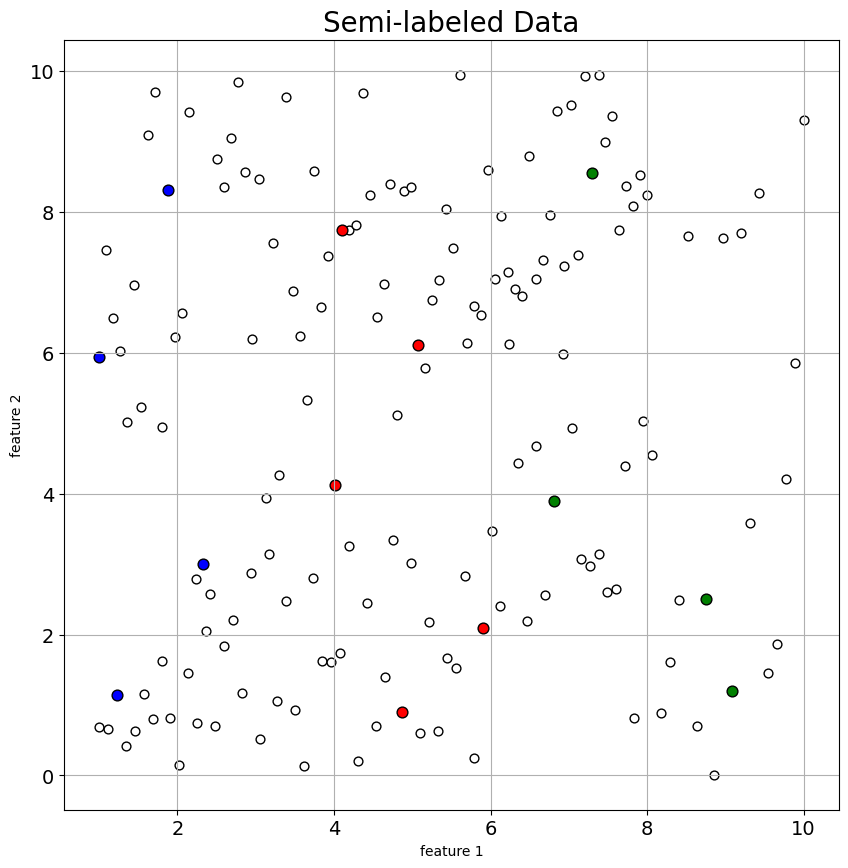

In [117]:
fig50=cu.plot_data(npData,npLabs)

In [118]:
dict_Data=cu.np2dict(npData)
dict_Labs=cu.np2dict(npLabs_new)
kC1=1.0

In [119]:
retdict_alpha,retdict_mu,retdict_cova,retdict_ynew,it=myclient.predict(dict_Data,dict_Labs,kC1,api_name="/train_dgnb_semisup_api")

In [120]:
ret_alpha=np.array(retdict_alpha['data'])
ret_mu=np.array(retdict_mu['data'])
ret_cova=np.array(retdict_cova['data'])
ret_ynew=np.array(retdict_ynew['data'])

In [121]:
ynew=ret_ynew.reshape((ret_ynew.shape[0],),order='F')

In [122]:
bmask_un=(ynew==0)
#Xun=X[bmask_un,:]
Xlab=X[~bmask_un,:]
ylab=ynew[~bmask_un]
#
lab_labels=np.unique(ylab)
kNum_lab_labels=lab_labels.shape[0]

<Figure size 1000x1000 with 0 Axes>

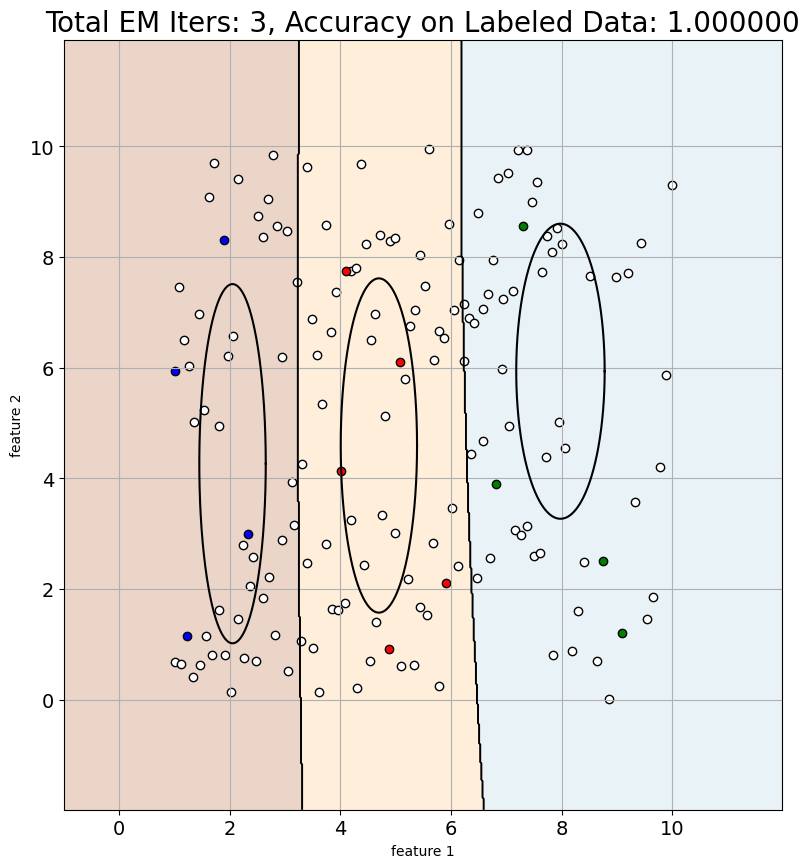

In [123]:
fig51=cu.plot_dgnb_semisup(ret_alpha,ret_mu,ret_cova,X,ynew,Xlab,ylab,kNum_lab_labels,it)